# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
     # Create endpoint URL with each city
    city_url = "https://api.openweathermap.org/data/2.5/weather/city?
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1       

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        example = requests.get(f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial")
        example2 = example.json()
        example2

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = example2['coord']['lat']
        city_lng = example2['coord']['lon']
        city_max_temp = example2['main']['temp_max']
        city_humidity = example2['main']['humidity']
        city_clouds = example2['clouds']['all']
        city_wind = example2['wind']['speed']
        city_country = example2['sys']['country']
        city_date = example2['dt']

        # Append the City information into city_data list (get from list to dict)
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | mogocha
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | danilov
Processing Record 8 of Set 1 | ar ruways
Processing Record 9 of Set 1 | aral
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | galesong
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | hurricane
Processing Record 14 of Set 1 | illizi
Processing Record 15 of Set 1 | taungoo
Processing Record 16 of Set 1 | muisne
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | fort st. john
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | angostura
Processing

Processing Record 40 of Set 4 | lazaro cardenas
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | tolanaro
Processing Record 43 of Set 4 | arno
Processing Record 44 of Set 4 | whitehorse
Processing Record 45 of Set 4 | bhamo
Processing Record 46 of Set 4 | celestun
Processing Record 47 of Set 4 | geraldton
Processing Record 48 of Set 4 | mahibadhoo
Processing Record 49 of Set 4 | tiksi
Processing Record 0 of Set 5 | sisimiut
Processing Record 1 of Set 5 | kenora
Processing Record 2 of Set 5 | lerwick
Processing Record 3 of Set 5 | mysen
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | fort bragg
Processing Record 6 of Set 5 | umm kaddadah
Processing Record 7 of Set 5 | shimoda
Processing Record 8 of Set 5 | kolonia
Processing Record 9 of Set 5 | san luis de la loma
Processing Record 10 of Set 5 | wewak
Processing Record 11 of Set 5 | port macquarie
Processing Record 12 of Set 5 | minas de marcona
Processing Record 13 of Set 5 | cargados

Processing Record 29 of Set 8 | brigantine
Processing Record 30 of Set 8 | mobaye
Processing Record 31 of Set 8 | hirara
Processing Record 32 of Set 8 | cururupu
Processing Record 33 of Set 8 | belokurikha
Processing Record 34 of Set 8 | port moresby
Processing Record 35 of Set 8 | cambria
Processing Record 36 of Set 8 | checker hall
City not found. Skipping...
Processing Record 37 of Set 8 | tsiombe
Processing Record 38 of Set 8 | punta arenas
Processing Record 39 of Set 8 | prado
Processing Record 40 of Set 8 | yatou
Processing Record 41 of Set 8 | atherton
Processing Record 42 of Set 8 | laughlin
Processing Record 43 of Set 8 | bosobolo
Processing Record 44 of Set 8 | acarau
Processing Record 45 of Set 8 | horta
Processing Record 46 of Set 8 | el porvenir
Processing Record 47 of Set 8 | rawson
Processing Record 48 of Set 8 | baskale
Processing Record 49 of Set 8 | volokonovka
Processing Record 0 of Set 9 | tralee
Processing Record 1 of Set 9 | parun
Processing Record 2 of Set 9 | no

Processing Record 23 of Set 12 | boundiali
Processing Record 24 of Set 12 | elesbao veloso
Processing Record 25 of Set 12 | kirensk
Processing Record 26 of Set 12 | seminole
Processing Record 27 of Set 12 | mount carmel
Processing Record 28 of Set 12 | dolores
Processing Record 29 of Set 12 | inhambane
Processing Record 30 of Set 12 | cazorla
Processing Record 31 of Set 12 | queenstown
Processing Record 32 of Set 12 | nishinoomote
Processing Record 33 of Set 12 | grand falls-windsor
Processing Record 34 of Set 12 | maxixe
Processing Record 35 of Set 12 | slave lake
Processing Record 36 of Set 12 | ijuw
City not found. Skipping...
Processing Record 37 of Set 12 | willowmore
Processing Record 38 of Set 12 | opp
Processing Record 39 of Set 12 | santo amaro da imperatriz
Processing Record 40 of Set 12 | cooper's town
Processing Record 41 of Set 12 | holualoa
Processing Record 42 of Set 12 | felidhoo
City not found. Skipping...
Processing Record 43 of Set 12 | sao francisco
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,42.31,100,100,9.22,US,1685200786
1,mogocha,53.7333,119.7667,36.52,79,84,4.97,RU,1685200786
2,petropavlovsk-kamchatsky,53.0452,158.6483,39.79,81,0,2.24,RU,1685200493
3,grytviken,-54.2811,-36.5092,37.85,90,50,9.64,GS,1685200786
4,port-aux-francais,-49.3500,70.2167,44.76,87,73,23.15,TF,1685200786


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,42.31,100,100,9.22,US,1685200786
1,mogocha,53.7333,119.7667,36.52,79,84,4.97,RU,1685200786
2,petropavlovsk-kamchatsky,53.0452,158.6483,39.79,81,0,2.24,RU,1685200493
3,grytviken,-54.2811,-36.5092,37.85,90,50,9.64,GS,1685200786
4,port-aux-francais,-49.3500,70.2167,44.76,87,73,23.15,TF,1685200786


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

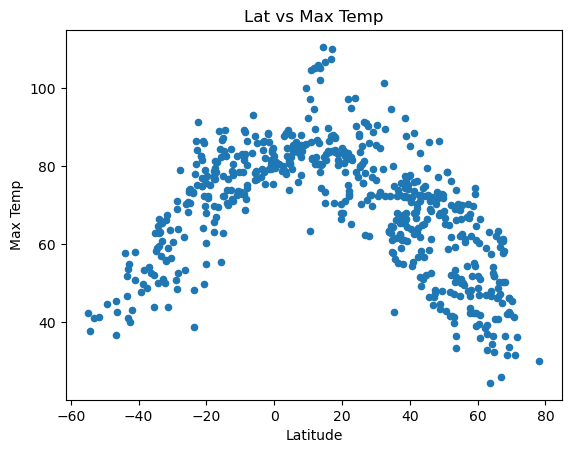

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Max Temp")

# Incorporate the other graph properties
plt.title("Lat vs Max Temp") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

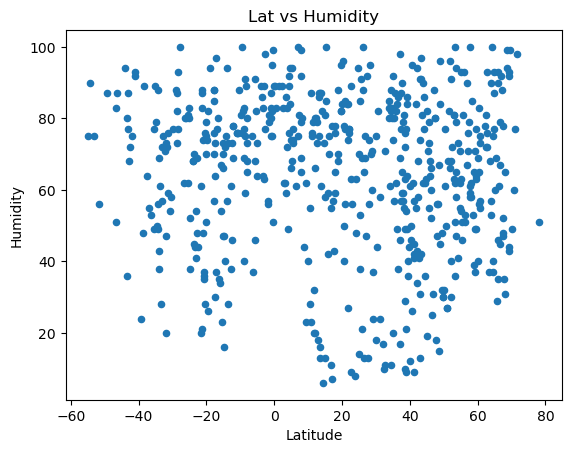

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Humidity")

# Incorporate the other graph properties
plt.title("Lat vs Humidity") 
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

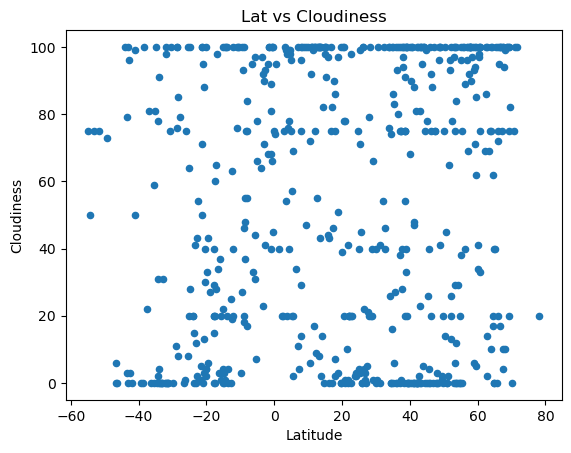

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Cloudiness")

# Incorporate the other graph properties
plt.title("Lat vs Cloudiness") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

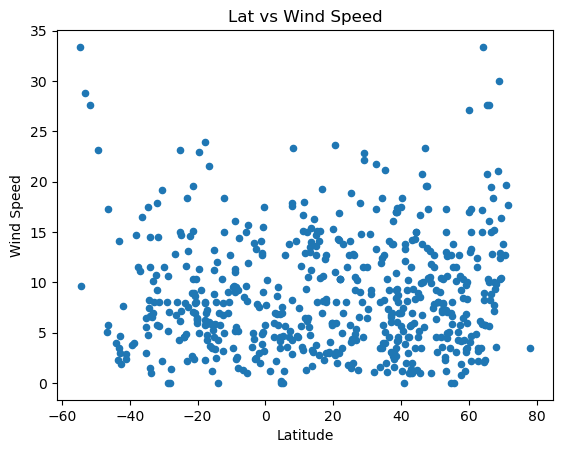

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Wind Speed")

# Incorporate the other graph properties
plt.title("Lat vs Wind Speed") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):

#line regress template
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

#plot and line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

#line equation string
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <=0]
    
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,37.85,90,50,9.64,GS,1685200786
4,port-aux-francais,-49.3500,70.2167,44.76,87,73,23.15,TF,1685200786
5,blackmans bay,-43.0167,147.3167,53.73,77,100,4.68,AU,1685200786
10,galesong,-5.3166,119.3661,78.82,82,7,8.12,ID,1685200787
16,ushuaia,-54.8000,-68.3000,42.42,75,75,33.38,AR,1685200626


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,42.31,100,100,9.22,US,1685200786
1,mogocha,53.7333,119.7667,36.52,79,84,4.97,RU,1685200786
2,petropavlovsk-kamchatsky,53.0452,158.6483,39.79,81,0,2.24,RU,1685200493
6,danilov,58.1908,40.1717,62.08,58,90,8.41,RU,1685200787
7,ar ruways,24.1103,52.7306,90.16,48,2,11.48,AE,1685200787


###  Temperature vs. Latitude Linear Regression Plot

r-value = -0.7765832962212422


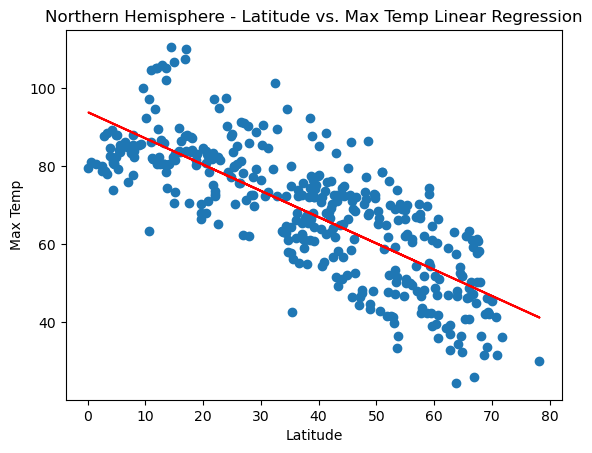

In [41]:
# Linear regression on Northern Hemisphere

# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression on Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Latitude vs. Max Temp Linear Regression')

#print r value
print(f"r-value = {r_value}")

# Show plot
plt.show()

r-value = 0.8119060473627084


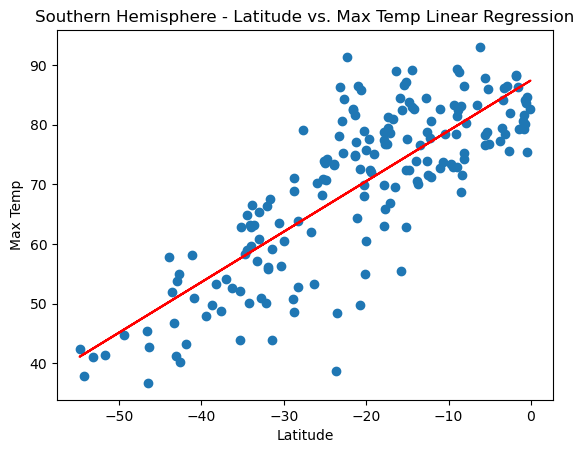

In [42]:
# Linear regression on Southern Hemisphere
# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression on Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Latitude vs. Max Temp Linear Regression')

#print r value
print(f"r-value = {r_value}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is a strong negative correlation between Latitude and Max temp in the Northern Hemisphere highlighted by an r- value of -0.77. The regression fits well into the data.
There is a strong positive correlation between Latitude and Max temp in the Southern Hemisphere highlighted by an r- value of 0.81. The regression fits well into the data

### Humidity vs. Latitude Linear Regression Plot

r-value = -0.03198731638801534


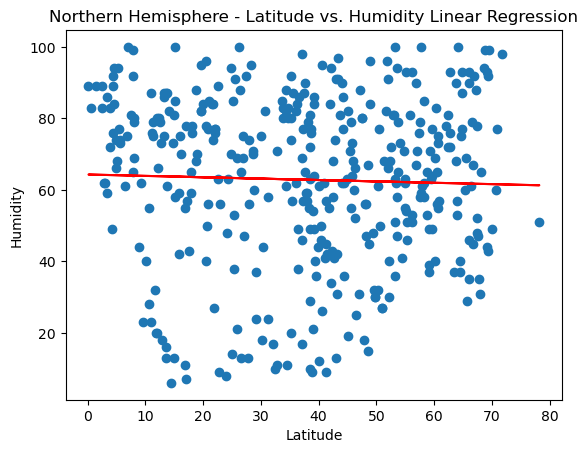

In [43]:
# Northern Hemisphere
# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression on Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Latitude vs. Humidity Linear Regression')

#print r value
print(f"r-value = {r_value}")

# Show plot
plt.show()

r-value = 0.08114869106836407


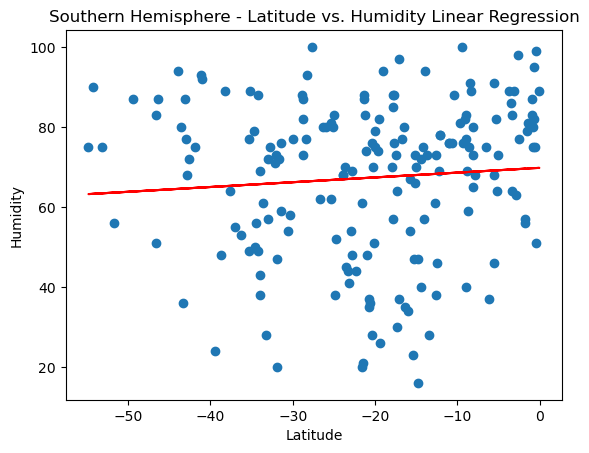

In [44]:
# Southern Hemisphere
# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression on Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Latitude vs. Humidity Linear Regression')

#print r value
print(f"r-value = {r_value}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
There is NOT a strong correlation between Latitude and Humidity in the Northern Hemisphere highlighted by an r- value of -0.03. The regression does NOT fit well into the data.
There is Not a strong correlation between Latitude and Humidity in the Southern Hemisphere highlighted by an r- value of 0.08. The regression does NOT fit well into the data

### Cloudiness vs. Latitude Linear Regression Plot

r-value = 0.03675912392241969


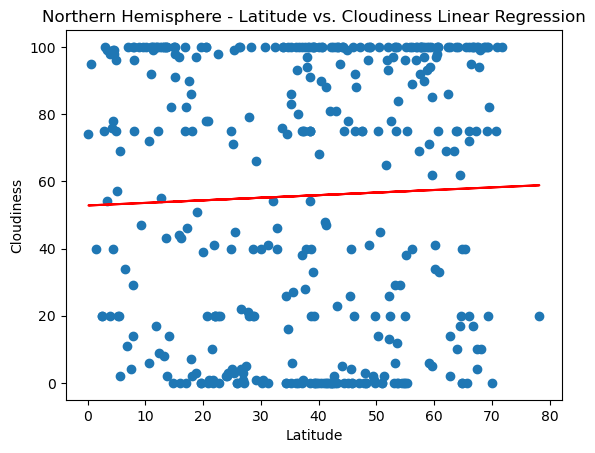

In [45]:
# Northern Hemisphere
# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression on Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Latitude vs. Cloudiness Linear Regression')

#print r value
print(f"r-value = {r_value}")

# Show plot
plt.show()

r-value = 0.19542102341595818


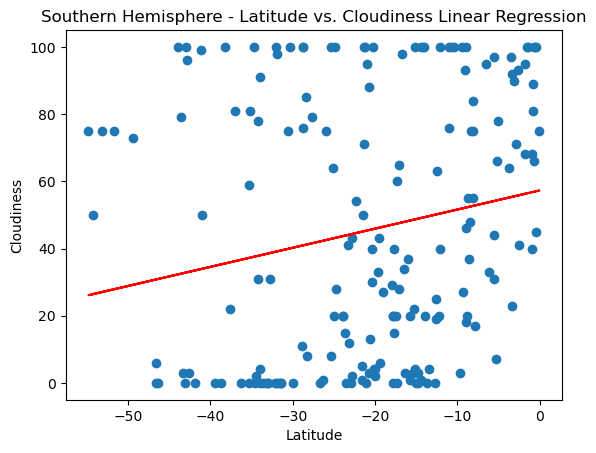

In [46]:
# Southern Hemisphere
# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression on Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Latitude vs. Cloudiness Linear Regression')

#print r value
print(f"r-value = {r_value}")

# Show plot
plt.show()

**Discussion about the linear relationship:**
There is NOT a strong correlation between Latitude and Cloudiness in the Northern Hemisphere highlighted by an r- value of 0.04. The regression does NOT fit well into the data.
There is Not a strong positive correlation between Latitude and Cloudiness in the Southern Hemisphere highlighted by an r- value of 0.20. The regression does NOT fit well into the data

### Wind Speed vs. Latitude Linear Regression Plot

r-value = 0.12310524720047014


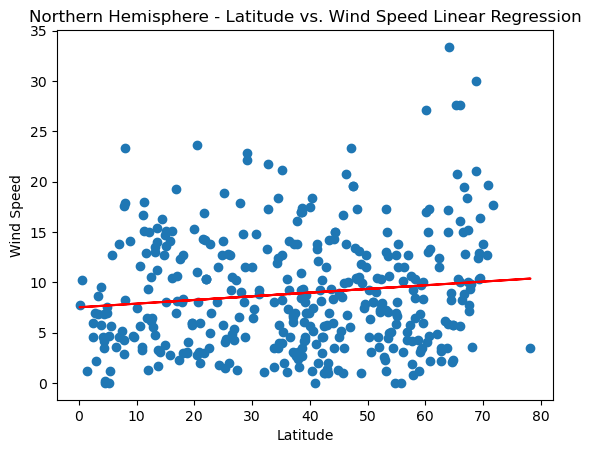

In [47]:
# Northern Hemisphere
# Define x and y values for linear regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression on Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Latitude vs. Wind Speed Linear Regression')

#print r value
print(f"r-value = {r_value}")

# Show plot
plt.show()

r-value = -0.16754459840378727


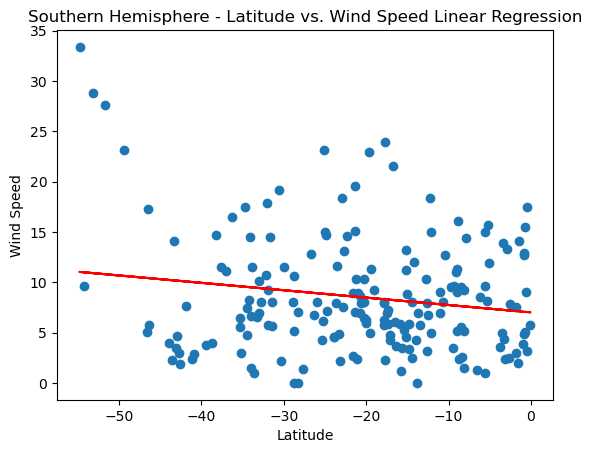

In [48]:
# Southern Hemisphere
# Define x and y values for linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression on Hemisphere temperature vs. latitude
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Define equation of line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,slope*x_values+intercept,"r-")

# Add line equation and other plot properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Latitude vs. Wind Speed Linear Regression')

#print r value
print(f"r-value = {r_value}")

# Show plot
plt.show()

**Discussion about the linear relationship:**
There is NOT a strong correlation between Latitude and Wind Speed in the Northern Hemisphere highlighted by an r- value of 0.12. The regression does NOT fit well into the data.
There is Not a strong correlation between Latitude and Wind Speed in the Southern Hemisphere highlighted by an r- value of -0.17. The regression does NOT fit well into the data